# Chapter 1

## 1.7 A First Class Application: Classifying Iris Species

### 1.7.1 Meet the Data

In [2]:
from sklearn.datasets import load_iris 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
iris_dataset = load_iris()
iris_dataset.keys() # This is a bunch object that behaves like a dict with key:value pairs
# print(iris_dataset['DESCR']) # This is retrieving that value associated with key, in this case a string 
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 1.7.2 Measuring Success: Training and Testing Data

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

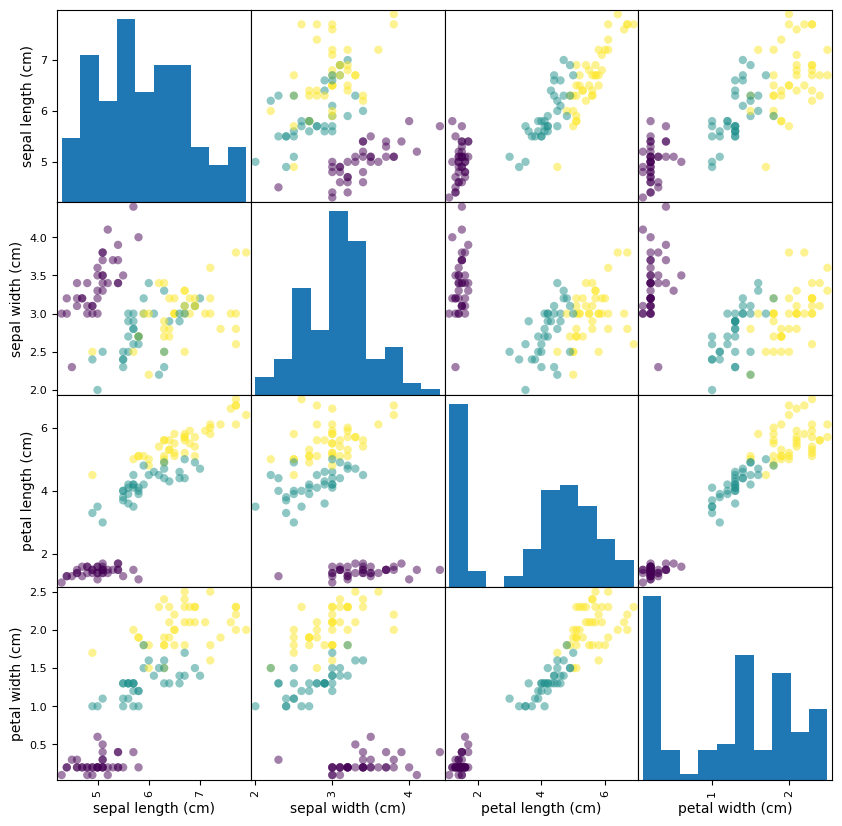

In [3]:
from sklearn.model_selection import train_test_split
print(type(iris_dataset['data']))
print(type(iris_dataset['target']))

# In this one line of code, data has been shuffled and split. Also, we are specifying
# ... random_state = 0 because a psuedorandom number generator shuffles the data and 
# ... we need to make sure it produces the same output every time the data is shuffled. 
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0)

# Now going to create a pair plot 
# iris_data_df = pd.DataFrame()
print(iris_dataset.feature_names)
train_iris_features_df = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

#! Needed to use c parameter to specify color of the labels.
pd.plotting.scatter_matrix(frame= train_iris_features_df, marker='o', c = y_train, figsize=(10,10))


### 1.7.4 Building Your First Model: k-Nearest Neighbors

In [4]:
# Create an estimator object - this object can perform class specific methods and has class attributes

first_knn_model = KNeighborsClassifier(n_neighbors=1) # Group based on nearest neighbor
first_knn_model.fit(X_train, y_train) # This has been modified in place, so the estimator object has fit the data using kNN


KNeighborsClassifier(n_neighbors=1)

### 1.7.5 Making Predictions

In [5]:
wild_iris = np.array([[5, 2.9, 1, 0.2]])
display(wild_iris.shape) #! Need to make sure that the new data sample is in the same shape as the main training data 
prediction = first_knn_model.predict(wild_iris)
iris_dataset['target_names'][prediction][0]

(1, 4)

'setosa'

### 1.7.6 Evaluating the Model 

In [6]:
prediction = first_knn_model.predict(X_test)
round(first_knn_model.score(X_test, y_test), 2) # Here we're giving the model X_test (what we want to test) and the true labels (y_test). 
# It makes a prediction for X_test that we cannot see and compares it against y_test to give the score. 

0.97

# Chapter 2

## 2.3 Supervised Machine Learning Algorithms 

### 2.3.5 Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

cancer = load_breast_cancer()
print(load_breast_cancer().keys())

# Split the test data and shuffle randomly the same way each time 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Instantiate class object (making an instance of the class object)
first_tree = DecisionTreeClassifier(random_state=0, max_depth = 4) 

# Train the model using the train data
first_tree.fit(X_train, y_train)

print(f"Score on train data: {round(first_tree.score(X_train, y_train), 6)}")
print(f"Score on test data: {round(first_tree.score(X_test, y_test), 6)}")

# Update tree.dot (text file which represents graphs)

export_graphviz(first_tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Score on train data: 0.988263
Score on test data: 0.951049


#### Visualizing Decision Tree

In [8]:

from sklearn.tree import export_graphviz
export_graphviz(first_tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)




In [9]:
import pandas as pd

# Attempt to fit data, features

# Load data into DataFrames
folder = "variable_area_P4"

load_filename = "LOADP4_vA_16mm"
pvc_filename = load_filename.replace("LOAD", "PVC")


load =  pd.read_csv(
    "C:/Users/asenn/OneDrive/School/Research/Miscellaneous//SPIE 2023/Data/curved_and_repeated_testing/" + folder + "/" + load_filename + ".csv",
    # Do not read row 1 (zero index) of Excel file
    skiprows=18,
    # Read cols A:C only in Excel,
    usecols=["Relative Time", 'CH110'],
    # The index (or x-axis)
)

pvc = pd.read_csv(
        "C:/Users/asenn/OneDrive/School/Research/Miscellaneous/SPIE 2023/Data/curved_and_repeated_testing/" + folder + "/" + pvc_filename + ".csv",

    # Do not read row 1 (zero index) of Excel file
    skiprows=18,
    # Read cols A:C only in Excel
    usecols=["CH119"],
    # Load time index will be used
)

pvc.rename(columns={"CH119" : "Voltage (V)"})
load.rename(columns={"CH110" : "Load (g)"})


,Relative Time,Load (g)
0,0.000000,-0.000240
1,0.052232,-0.000240
2,0.107188,-0.000240
3,0.159410,-0.000240
4,0.233573,-0.000240
...,...,...
859,52.962017,0.015314
860,53.035477,0.015314
861,53.087700,0.015310
862,53.143880,0.015315


# Implementation

In [10]:
import os
from pathlib import Path

##############################################################
# Input load file name, PVC file name will be automatically generated
load_filename = "LOADP4_vA_16mm"
pvc_filename = load_filename.replace("LOAD", "PVC")

# Verify folder is correct
folder = "variable_area_P4"
##############################################################


DEFAULT_DATA_DIR = Path("~/SPIE_data/").expanduser()
# final filename string 
final_file = load_filename.replace("LOAD", "")



# Default data directory
# ~ stands for the user folder: C:/Users/username
# .expanduser() ensures that the tilde ~ actually represents the user's home path


if os.path.exists(f"{DEFAULT_DATA_DIR}\{folder}") == False:
    (DEFAULT_DATA_DIR/Path(folder)).mkdir(parents=True, exist_ok = False)


load =  pd.read_csv(
    "C:/Users/asenn/OneDrive/School/Research/Miscellaneous//SPIE 2023/Data/curved_and_repeated_testing/" + folder + "/" + load_filename + ".csv",
    # Do not read row 1 (zero index) of Excel file
    skiprows=18,
    # Read cols A:C only in Excel,
    usecols=["Relative Time", 'CH110'],
    # The index (or x-axis)
)

pvc = pd.read_csv(
        "C:/Users/asenn/OneDrive/School/Research/Miscellaneous//SPIE 2023/Data/curved_and_repeated_testing/" + folder + "/" + pvc_filename + ".csv",

    # Do not read row 1 (zero index) of Excel file
    skiprows=18,
    # Read cols A:C only in Excel
    usecols=["CH119"],
    # Load time index will be used
)

Load = "CH110"
PVC = "CH119"


pvc.drop([len(pvc)-1])
# drop the last row so pvc and load have...
# ... same number of datapoints

response_vs_time_df = load.join(pvc, how='left').set_index("Relative Time")


# Interpolating dataframe and getting rid of NaN
# .sort_index() numercally sorts index and all attached data
# .bfill() fills NaN values a particular value see documentation (only one Nan value after interpolate)
response_vs_time_df = response_vs_time_df.sort_index().interpolate().bfill()

# Offsetting load column to disregard initial tension on load cell 
# Uses avgLoad for the first two seconds
timeRange = response_vs_time_df[(response_vs_time_df.index) < 2]
avgLoad = timeRange[Load].mean()
response_vs_time_df = response_vs_time_df - [avgLoad,0]

# Converting PVC from V to mV
response_vs_time_df[PVC] = response_vs_time_df[PVC] * 1000


# Converting Load from V to mv, then to grams (10mv = 250g Compression)
response_vs_time_df[Load] = response_vs_time_df[Load] * 1000 * 25

response_vs_time_df

response_vs_time_df_renamed = response_vs_time_df.rename(columns={"CH119" : "Response (mV)", "CH110" : "Load (g)"})
response = response_vs_time_df_renamed[["Response (mV)"]]
load = response_vs_time_df_renamed[["Load (g)"]]
load.shape


(864, 1)

## DecisionTreeRegressor

Score on train data: 0.99123
Score on test data: 0.931637


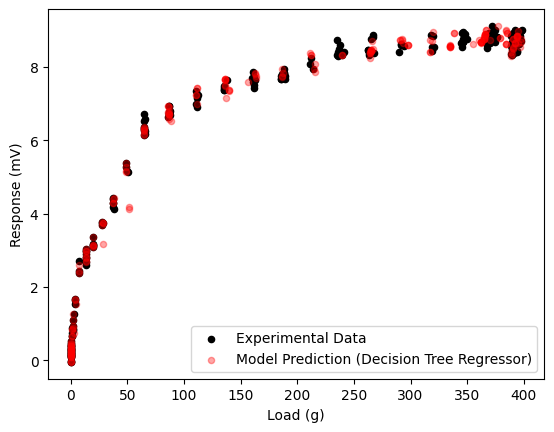

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

response_vs_time_df_renamed["Response (mV)"]
response_vs_time_df_renamed["Load (g)"]

# # Split the test data between a training a test set and shuffle randomly the same way each time 
X_train, X_test, y_train, y_test = train_test_split(response, load, random_state=42)

# # Instantiate class object (making an instance of the class object)
first_tree = DecisionTreeRegressor(random_state=0, max_depth = 10) 

# # Establish the model using the train data
first_tree.fit(X_train, y_train)

# Test the model that was created using the train data and see how it predicts the train output and test data output
print(f"Score on train data: {round(first_tree.score(X_train, y_train), 6)}")
print(f"Score on test data: {round(first_tree.score(X_test, y_test), 6)}")

plt.figure()
plt.scatter(y_test, X_test, s=20, c="black", label="data")
plt.scatter(first_tree.predict(X_test), X_test, s=20, alpha = 0.35, c="red", label="data")
plt.ylabel("Response (mV)")
plt.xlabel("Load (g)")
plt.legend(["Experimental Data", "Model Prediction (Decision Tree Regressor)"])

## KNeighbors Regressor

Score on train data: 0.96894
Score on test data: 0.960498


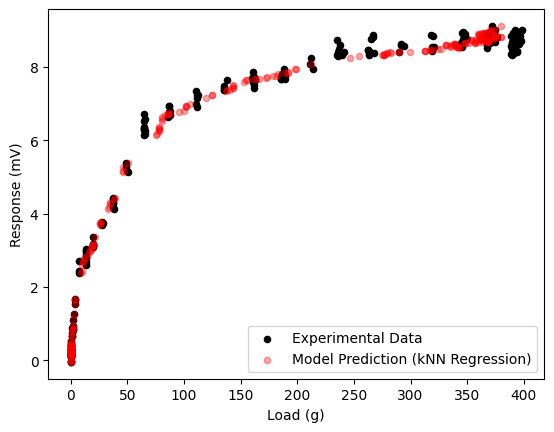

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

response_vs_time_df_renamed["Response (mV)"]
response_vs_time_df_renamed["Load (g)"]

# # Split the test data between a training a test set and shuffle randomly the same way each time 
X_train, X_test, y_train, y_test = train_test_split(response, load, random_state=42)

# # Instantiate class object (making an instance of the class object)
first_tree = KNeighborsRegressor(n_neighbors=30) 

# # Establish the model using the train data
first_tree.fit(X_train, y_train)

# Test the model that was created using the train data and see how it predicts the train output and test data output
print(f"Score on train data: {round(first_tree.score(X_train, y_train), 6)}")
print(f"Score on test data: {round(first_tree.score(X_test, y_test), 6)}")

plt.figure()
plt.scatter(y_test, X_test, s=20, c="black", label="data")
plt.scatter(first_tree.predict(X_test), X_test, s=20, alpha = 0.35, c="red", label="data")
plt.ylabel("Response (mV)")
plt.xlabel("Load (g)")
plt.legend(["Experimental Data", "Model Prediction (kNN Regression)"])

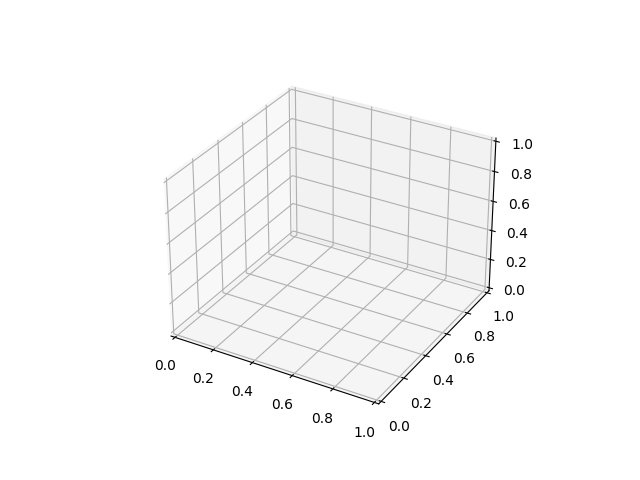

In [45]:
%matplotlib inline
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
